In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import os,pickle,random
from umap import UMAP

In [17]:
repo_dir = "/home/bruce1996/repo/LIHC_anomaly_detection/"

with open(repo_dir + 'data/scRNA-raw-data/GSE149614_coding_gene_hepatocyte_normalized.pkl', 'rb') as f :
    exp_m = pickle.load(f)
f.close()

with open(repo_dir + "data/Coding-gene-information/ensembl2hgnc.pkl",'rb') as f :
    ens2hgsc = pickle.load(f)
f.close()

hvg_df = pd.read_csv(repo_dir + 'data/scRNA-related-data/seurat_hvg1346_list.txt',sep='\t',index_col=0)
hvgs = hvg_df.EnsID.values
metadata = pd.read_csv(repo_dir + 'data/scRNA-raw-data/GSE149614_HCC.metadata.txt',sep='\t',index_col=0)
metadata = metadata.loc[exp_m.columns,:]
vote = pd.read_csv(repo_dir + "data/Ensemble-leanring-result/with_synthetic/ensemble_hbv_only_np_ratio_35_vote_result.txt",sep='\t',index_col=0)
voted_gene = list(set(vote.index[vote['Vote'] > 0]).intersection(exp_m.index))
non_voted_gene = list(set(set(vote.index) - set(voted_gene)).intersection(exp_m.index))

### Random non-voted genes UMAP clustering result

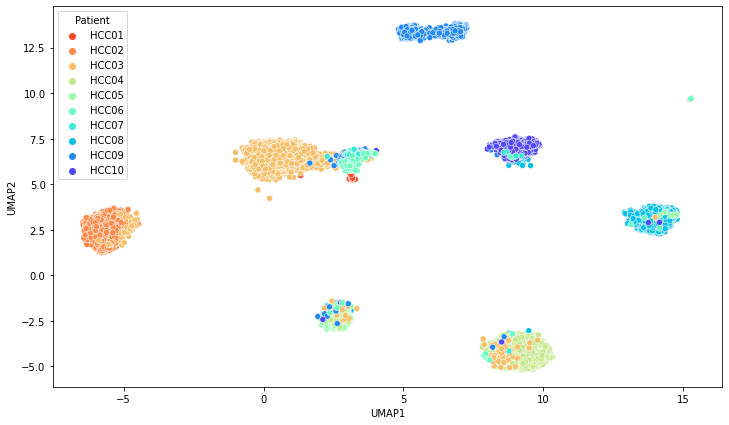

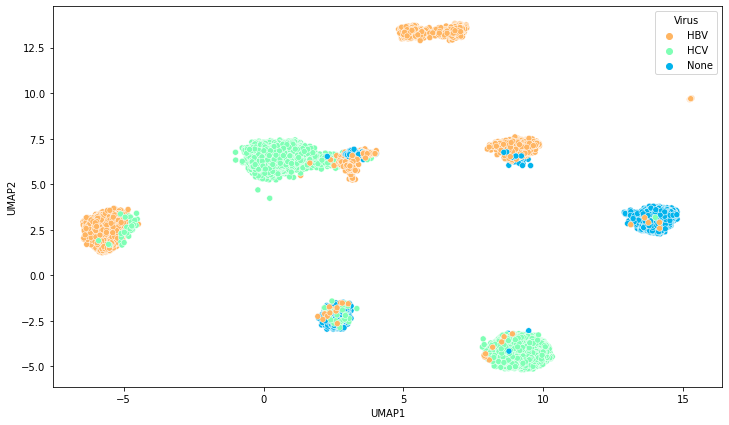

In [21]:
random_input = exp_m.loc[random.sample(non_voted_gene,len(voted_gene)),:]
reducer = UMAP()
embedding = reducer.fit_transform(random_input.T)
embedding_df = pd.DataFrame({'UMAP1' : embedding[:,0],'UMAP2' : embedding[:,1],
                             'Patient' : metadata.loc[random_input.columns,'patient'],
                             'Virus' : metadata.loc[random_input.columns,'virus']})

for condition in ['Patient','Virus'] :
    plt.figure(figsize=(12,7))
    sns.scatterplot(data=embedding_df,x='UMAP1',y='UMAP2',hue=condition,palette='rainbow_r',hue_order = sorted(set(embedding_df[condition])))
    plt.savefig(repo_dir + "result/scRNA_UMAP_clustering/random_sampling_UMAP_clustering_result_%s.pdf" % condition,format='pdf',dpi=300,bbox_inches='tight')
    plt.show()

### Voted gene UMAP clustering result

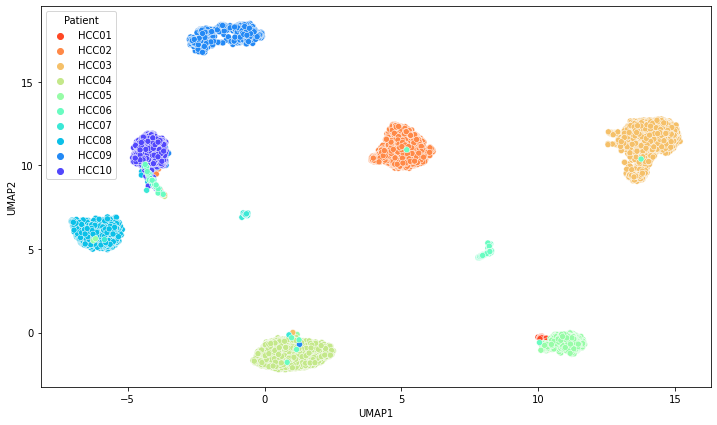

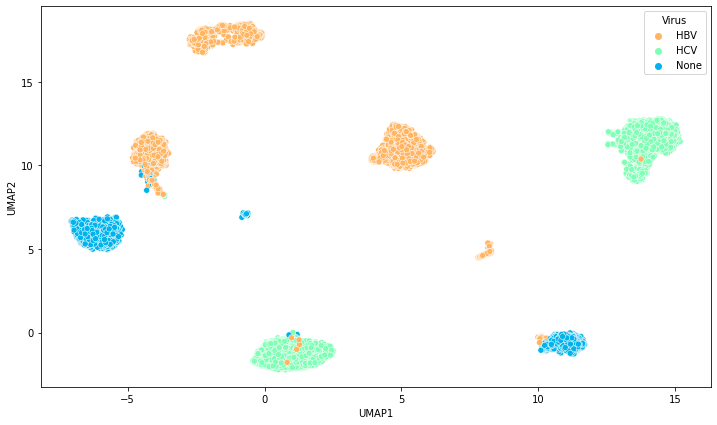

In [20]:
umpa_input = exp_m.loc[voted_gene,:]
reducer = UMAP()
embedding = reducer.fit_transform(umpa_input.T)
embedding_df = pd.DataFrame({'UMAP1' : embedding[:,0],'UMAP2' : embedding[:,1],
                             'Patient' : metadata.loc[random_input.columns,'patient'],
                             'Virus' : metadata.loc[random_input.columns,'virus']})

for condition in ['Patient','Virus'] :
    plt.figure(figsize=(12,7))
    sns.scatterplot(data=embedding_df,x='UMAP1',y='UMAP2',hue=condition,palette='rainbow_r',hue_order = sorted(set(embedding_df[condition])))
    plt.savefig(repo_dir + "result/scRNA_UMAP_clustering/voted_genes_UMAP_clustering_result_%s.pdf" % condition,format='pdf',dpi=300,bbox_inches='tight')
    plt.show()

### Seurat HVG1346 UMAP clustering result

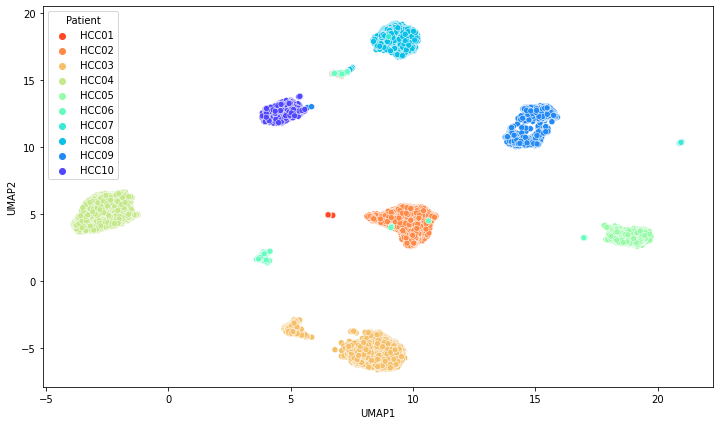

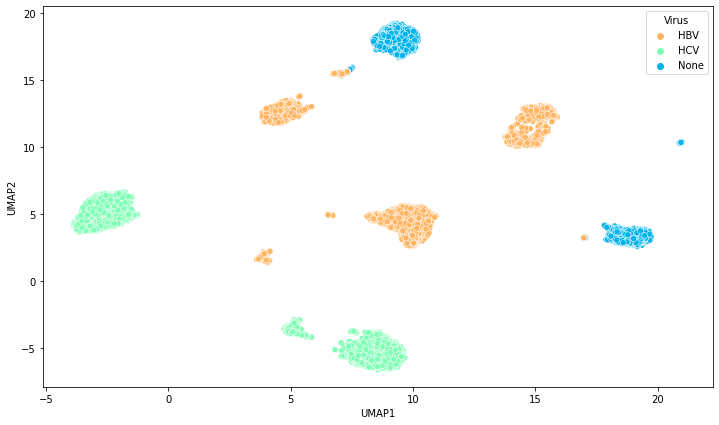

In [19]:
umap_input = exp_m.loc[hvgs,:]
reducer = UMAP()
embedding = reducer.fit_transform(umap_input.T)
embedding_df = pd.DataFrame({'UMAP1' : embedding[:,0],'UMAP2' : embedding[:,1],
                             'Patient' : metadata.loc[random_input.columns,'patient'],
                             'Virus' : metadata.loc[random_input.columns,'virus']})

for condition in ['Patient','Virus'] :
    plt.figure(figsize=(12,7))
    sns.scatterplot(data=embedding_df,x='UMAP1',y='UMAP2',hue=condition,palette='rainbow_r',hue_order = sorted(set(embedding_df[condition])))
    plt.savefig(repo_dir + "result/scRNA_UMAP_clustering/seurat_HVGs_UMAP_clustering_result_%s.pdf" % condition,format='pdf',dpi=300,bbox_inches='tight')
    plt.show()